In [7]:
import numpy as np
np.random.seed(865)

from keras.models import Model
from keras.layers import Input, merge, Conv2D, MaxPooling2D, \
UpSampling2D, Dropout, concatenate, Conv2DTranspose, Lambda, Reshape
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical
from scipy.misc import imsave
from os import path, makedirs
import argparse
import keras.backend as K
import logging
import pickle
import tifffile as tiff

import sys
sys.path.append('.')
from src.utils.runtime import funcname, gpu_selection
from src.utils.model import dice_coef, dice_coef_loss, \
KerasHistoryPlotCallback, KerasSimpleLoggerCallback, \
    jaccard_coef, jaccard_coef_int
from src.utils.data import random_transforms
from src.utils.isbi_utils import isbi_get_data_montage
import matplotlib.pyplot as plt

from pathlib import Path
from src.models.unet import *

## predict

In [9]:
test_path = str(Path.home() / 'data/isbi2012/test-volume.tif')

In [10]:
imgs_sbt = tiff.imread(test_path)

In [11]:
type(imgs_sbt), imgs_sbt.shape

(numpy.ndarray, (30, 512, 512))

In [12]:
model = UNet('unet')
model.config['input_shape'] = (512, 512)
model.config['output_shape'] = (512, 512)
model.compile()

In [13]:
model.net.load_weights('checkpoints/unet_64/weights_loss_val.weights')

In [14]:
msks_sbt = model.predict(imgs_sbt)

In [15]:
msks_sbt.shape

(30, 512, 512)

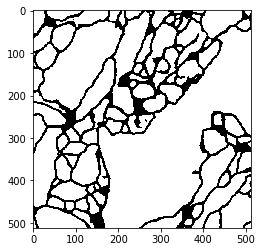

In [16]:
plt.imshow(msks_sbt[0], cmap='gray')